<a href="https://colab.research.google.com/github/luciosjodin/ProcesamientoDelHabla/blob/master/TP2_webscrapping_preprocesamiento_Sj%C3%B6din_Lucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 PROCESAMIENTO DEL HABLA

**Sjödin Lucio.**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [46]:
import requests
from bs4 import BeautifulSoup
import re

In [47]:
def extraer_texto(url, filename="texto_extraido.txt"):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        parrafo = []

        for p in soup.find_all("p"):
            t = p.get_text(strip=True)
            parrafo.append(t)

        texto = "\n\n".join(parrafo)

        with open(filename, "w", encoding="utf-8") as f:
            f.write(texto)

        print(f"Texto extraído y guardado en '{filename}'")
        return texto

    except requests.exceptions.RequestException as e:
        print(f"Error al acceder a la URL: {e}")
        return None
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

url = "https://www.iade.org.ar/noticias/discurso-de-pepe-mujica-en-rio20"
texto_extraido = extraer_texto(url, "Pepe Mujica.txt")

Texto extraído y guardado en 'Pepe Mujica.txt'


In [48]:
print(texto_extraido)



Texto del discurso pronunciado por José Mujica, Presidente de la República Oriental del Uruguay, en la cumbre Río+20

Conferencia de Naciones Unidas por el desarrollo sustentable

Autoridades presentes de todas la latitudes y organismos, muchas gracias. Muchas gracias al pueblo de Brasil y a su Sra. Presidenta, Dilma Rousseff. Muchas gracias a la buena fe que, seguramente, han manifestado todos los oradores que me precedieron. Expresamos la íntima voluntad como gobernantes de acompañar todos los acuerdos que, esta, nuestra pobre humanidad, pueda suscribir.

Sin embargo, permítasenos hacer algunas preguntas en voz alta. Toda la tarde se ha hablado del desarrollo sustentable. De sacar las inmensas masas de la pobreza.

¿Qué es lo que aletea en nuestras cabezas? ¿El modelo de desarrollo y de consumo, que es el actual de las sociedades ricas? Me hago esta pregunta: ¿qué le pasaría a este planeta si los hindúes tuvieran la misma proporción de autos por familia que tienen los alemanes?

¿C

In [49]:
discurso = texto_extraido[texto_extraido.find("Autoridades presentes de todas la latitudes y organismos, muchas gracias."):]
discurso = discurso[:discurso.find("20 de junio de 2012")]

print(discurso)

Autoridades presentes de todas la latitudes y organismos, muchas gracias. Muchas gracias al pueblo de Brasil y a su Sra. Presidenta, Dilma Rousseff. Muchas gracias a la buena fe que, seguramente, han manifestado todos los oradores que me precedieron. Expresamos la íntima voluntad como gobernantes de acompañar todos los acuerdos que, esta, nuestra pobre humanidad, pueda suscribir.

Sin embargo, permítasenos hacer algunas preguntas en voz alta. Toda la tarde se ha hablado del desarrollo sustentable. De sacar las inmensas masas de la pobreza.

¿Qué es lo que aletea en nuestras cabezas? ¿El modelo de desarrollo y de consumo, que es el actual de las sociedades ricas? Me hago esta pregunta: ¿qué le pasaría a este planeta si los hindúes tuvieran la misma proporción de autos por familia que tienen los alemanes?

¿Cuánto oxígeno nos quedaría para poder respirar? Más claro: ¿Tiene el mundo hoy los elementos materiales como para hacer posible que 7 mil u 8 mil millones de personas puedan tener el

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [50]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 76.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [51]:
import spacy

nlp = spacy.load("es_core_news_sm")

doc = nlp(discurso)

stop_words_found = [token.text for token in doc if token.is_stop]

print("Stop words encontradas en el discurso:")
print(stop_words_found)

Stop words encontradas en el discurso:
['de', 'todas', 'la', 'y', 'muchas', 'Muchas', 'al', 'de', 'y', 'a', 'su', 'Muchas', 'a', 'la', 'buena', 'que', 'han', 'todos', 'los', 'que', 'me', 'la', 'como', 'de', 'todos', 'los', 'que', 'esta', 'nuestra', 'pueda', 'Sin', 'embargo', 'hacer', 'algunas', 'en', 'Toda', 'la', 'tarde', 'se', 'ha', 'del', 'De', 'las', 'de', 'la', 'Qué', 'es', 'lo', 'que', 'en', 'nuestras', 'El', 'de', 'y', 'de', 'que', 'es', 'el', 'de', 'las', 'Me', 'hago', 'esta', 'qué', 'le', 'a', 'este', 'si', 'los', 'la', 'misma', 'de', 'por', 'que', 'tienen', 'los', 'Cuánto', 'nos', 'para', 'poder', 'Más', 'claro', 'Tiene', 'el', 'hoy', 'los', 'como', 'para', 'hacer', 'posible', 'que', 'u', 'de', 'tener', 'el', 'mismo', 'de', 'y', 'de', 'que', 'tienen', 'las', 'más', 'Será', 'eso', 'posible', 'O', 'que', 'algún', 'día', 'otro', 'de', 'Porque', 'hemos', 'esta', 'en', 'la', 'que', 'estamos', 'del', 'de', 'la', 'y', 'que', 'ha', 'un', 'y', 'Pero', 'la', 'de', 'ha', 'de', 'Y', 'nos

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

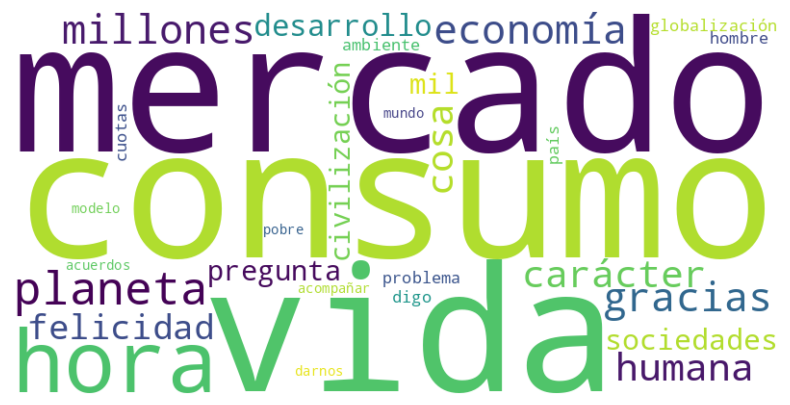

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

filtered_words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

cleaned_text = " ".join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False,max_words=30).generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

doc = nlp(texto_extraido)

sentences = []
for sent in doc.sents:
    cleaned_sentence = " ".join([token.text.lower() for token in sent if not token.is_stop and not token.is_punct and not token.is_space])
    if cleaned_sentence:
        sentences.append(cleaned_sentence)

vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(sentences)

vocabulario = vectorizer.get_feature_names_out()

print("\nForma de la matriz documento-vocabulario:", document_term_matrix.shape)
print("\nVocabulario (primeras 20 palabras):", vocabulario[:20])


Forma de la matriz documento-vocabulario: (60, 290)

Vocabulario (primeras 20 palabras): ['10' '100' '1000' '1116' '13' '20' '2012' '2545' '4381' '5411' '708x'
 '7380' '90' '9337' 'acompañar' 'acordar' 'actual' 'acuerdos' 'agrediendo'
 'agresión']



#### 2.3.2 Determina la longitud de tu vocabulario.

In [54]:
longitud_vocabulario = len(vocabulario)

print("Longitud del vocabulario:", longitud_vocabulario)

Longitud del vocabulario: 290



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_matrix = tfidf_transformer.fit_transform(document_term_matrix)

print("Forma de la matriz TF-IDF:", tfidf_matrix.shape)
print("\nMatriz TF-IDF (primeras 5 filas):")
print(tfidf_matrix.toarray()[:5])

Forma de la matriz TF-IDF: (60, 290)

Matriz TF-IDF (primeras 5 filas):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.34351114 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Conclusiones

El trabajo me resultó interesante. Pude extraer un discurso de una página web y a partir del mismo crear una nube de palabras. También lo pude dividir en oraciones y transformar el texto en datos numéricos muy útiles para análisis de datos.
Trabajé con varias librerías y pude comprender la sintaxis de cada una y su funcionamiento.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [56]:
# instalar wordcloud
!pip install wordcloud


In [57]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [58]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

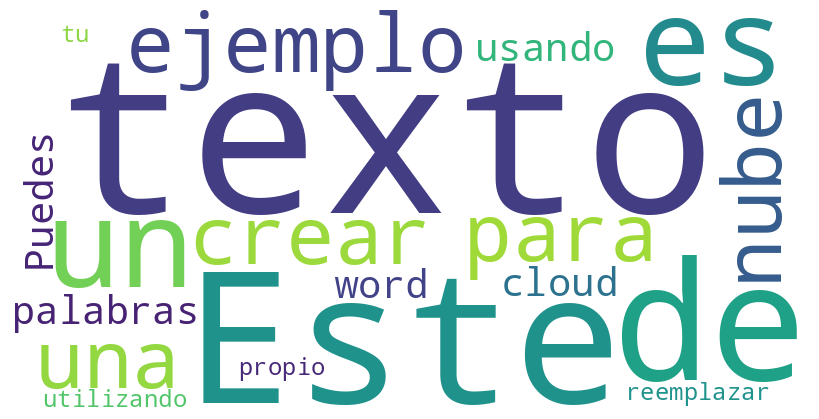

In [59]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



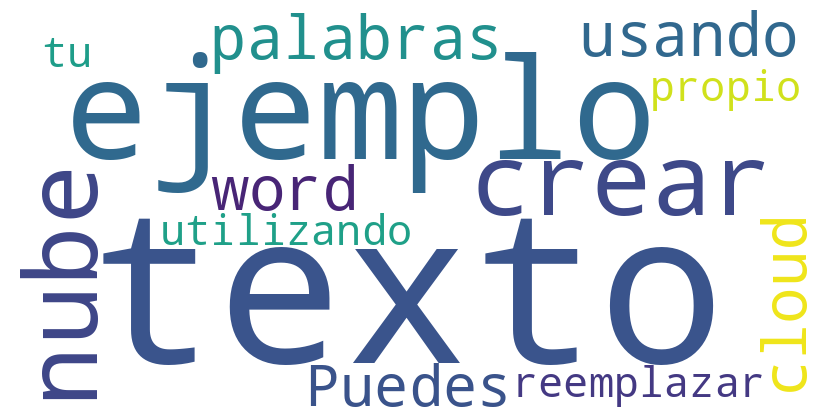

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
